In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
data.duplicated().sum()

0

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

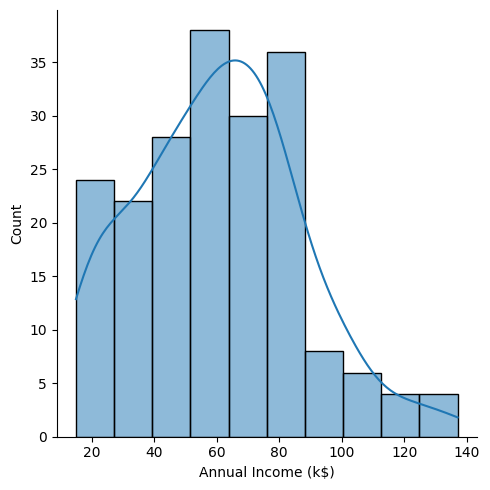

In [12]:
sns.displot(data['Annual Income (k$)'],kde=True)

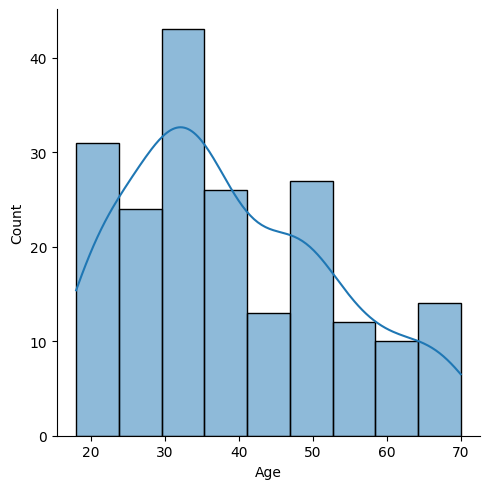

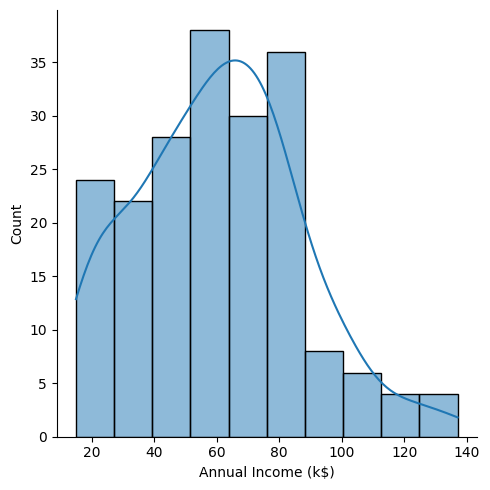

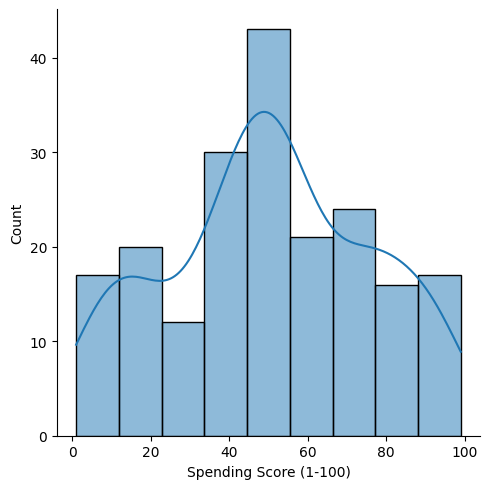

In [14]:
columns= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
  plt.figure
  sns.displot(data[i], kde=True)

In [16]:
gender_counts = data['Gender'].value_counts()

gender_counts

,count
Gender,
Female,112
Male,88


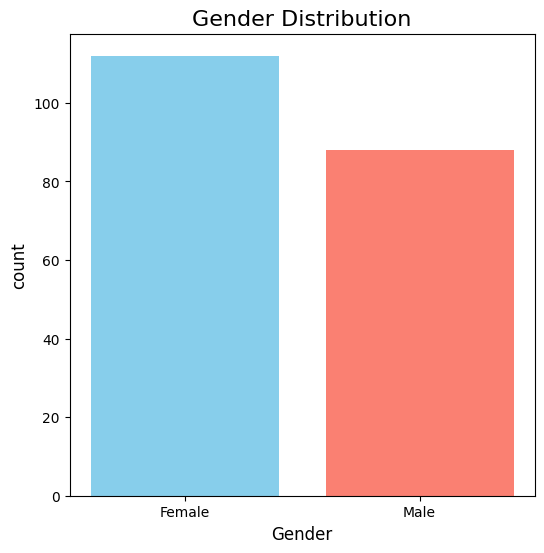

In [22]:
plt.figure(figsize=(6,6))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'salmon'])
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

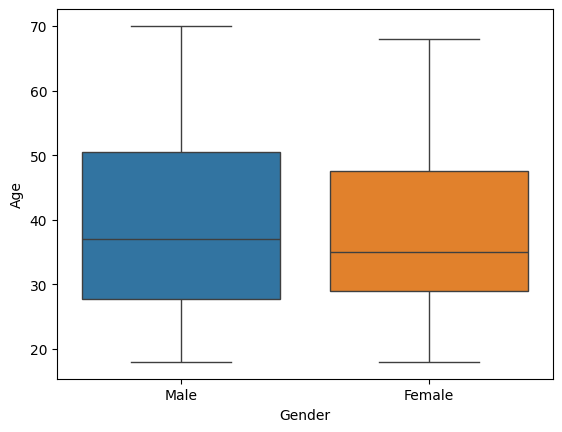

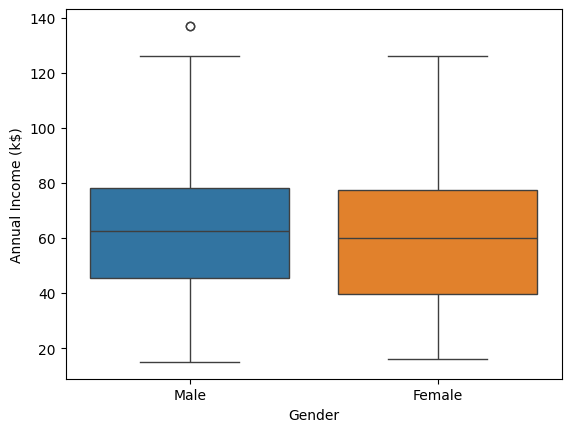

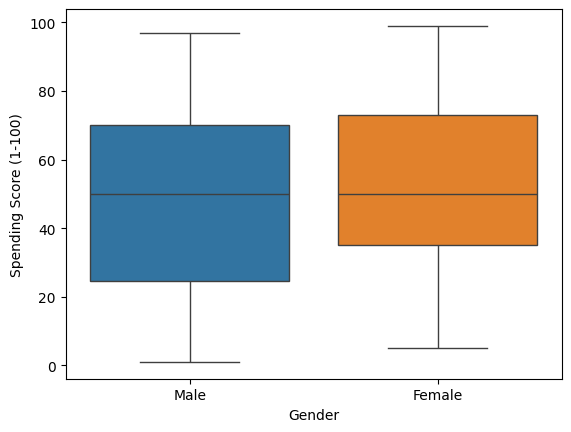

In [25]:
columns= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
  plt.figure()
  sns.boxplot(data=data, x='Gender', y=data[i], hue='Gender')

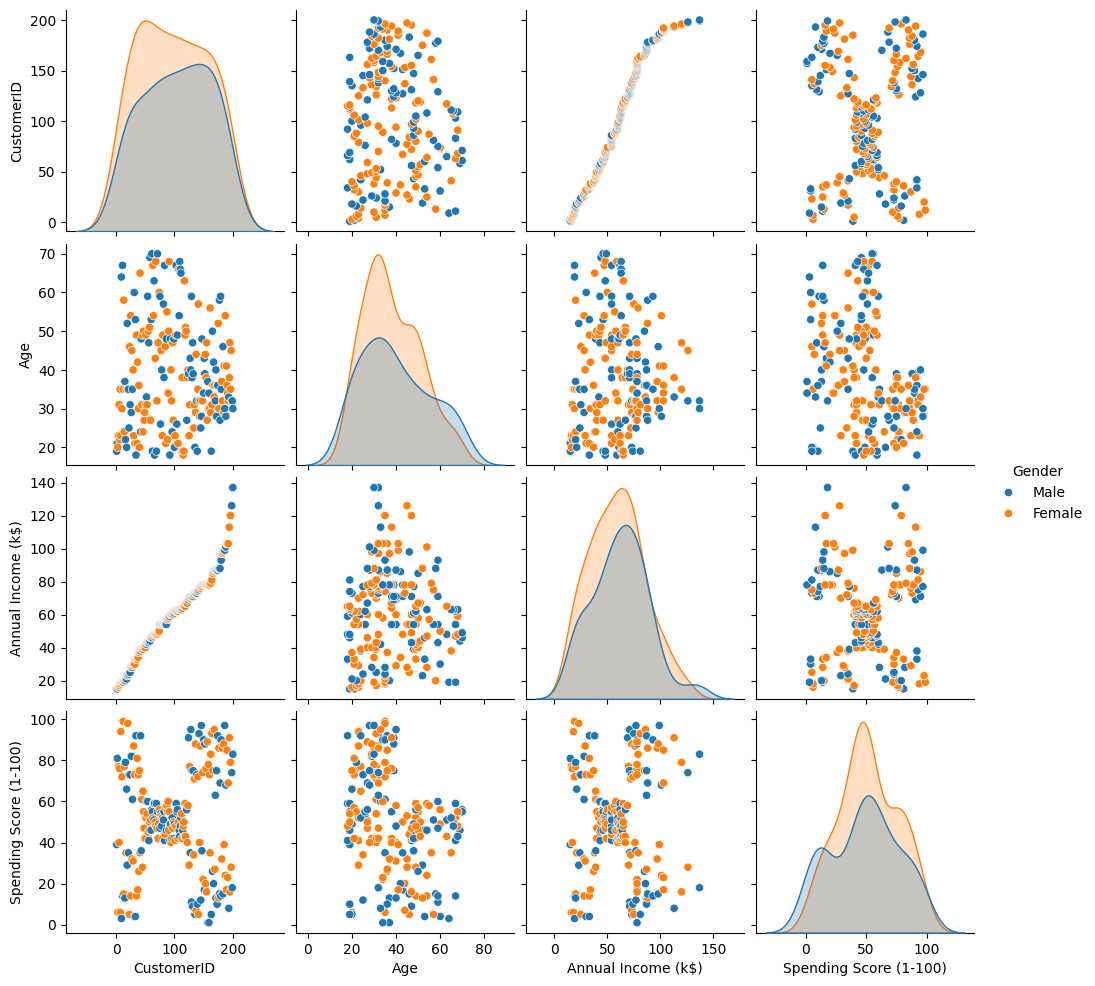

In [26]:
sns.pairplot(data, hue='Gender')

In [27]:
data.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [30]:
data.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

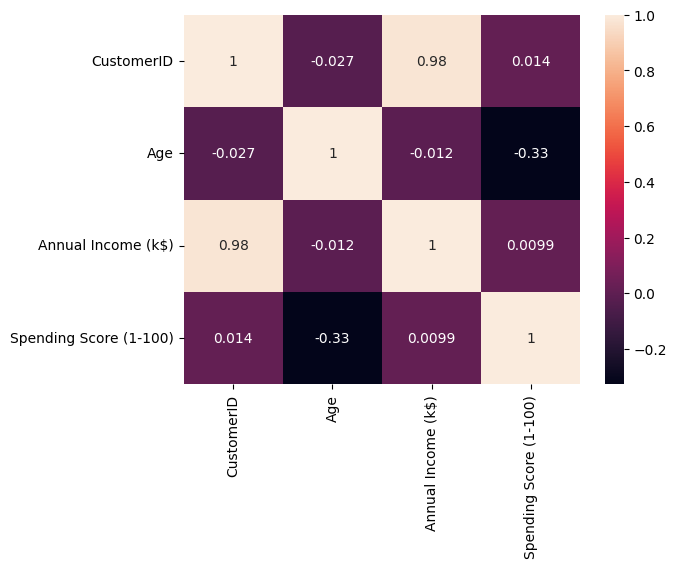

In [31]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [32]:
cluster_1 = KMeans(n_clusters=6)

In [35]:
cluster_1.fit(data[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [36]:
cluster_1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [37]:
data['Income Cluster'] = cluster_1.labels_

In [38]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


In [39]:
data['Income Cluster'].value_counts()

,count
Income Cluster,
4,48
0,42
1,42
3,32
5,28
2,8


In [40]:
cluster_1.inertia_

5050.904761904766

In [42]:
wcss_1 = []

range_values = range(1,10)
for i in range_values:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data[['Annual Income (k$)']])
  wcss_1.append(kmeans.inertia_)

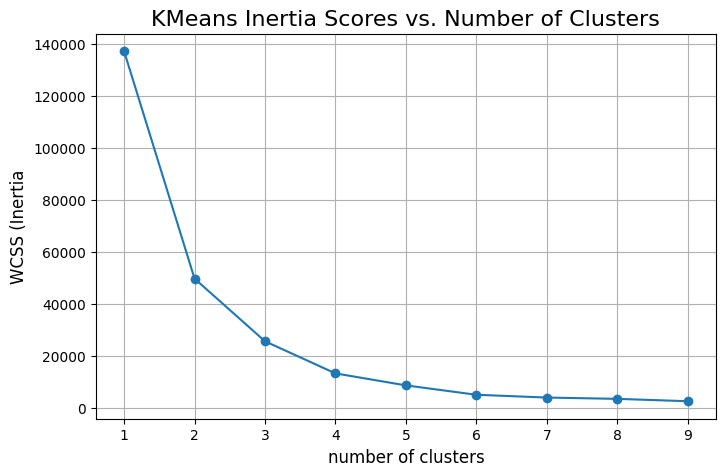

In [46]:
plt.figure(figsize=(8, 5))
plt.plot(range_values,wcss_1, '-o')

plt.title('KMeans Inertia Scores vs. Number of Clusters', fontsize=16)
plt.xlabel('number of clusters', fontsize=12)
plt.ylabel('WCSS (Inertia', fontsize=12)
plt.grid(True)
plt.show()

In [47]:
data.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,43.000000,42.238095,50.666667
1,35.428571,75.095238,51.095238
2,36.500000,124.000000,49.625000
3,34.906250,22.000000,49.656250
4,41.604167,60.083333,49.041667
5,38.214286,93.000000,50.928571


In [48]:
cluster_2 = KMeans(n_clusters=5)
cluster_2.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data['Spending and income Cluster']= cluster_2.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and income Cluster
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,3,3
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,3,3


In [49]:
wcss_1 = []

range_values = range(1,10)
for i in range_values:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
  wcss_1.append(kmeans.inertia_)

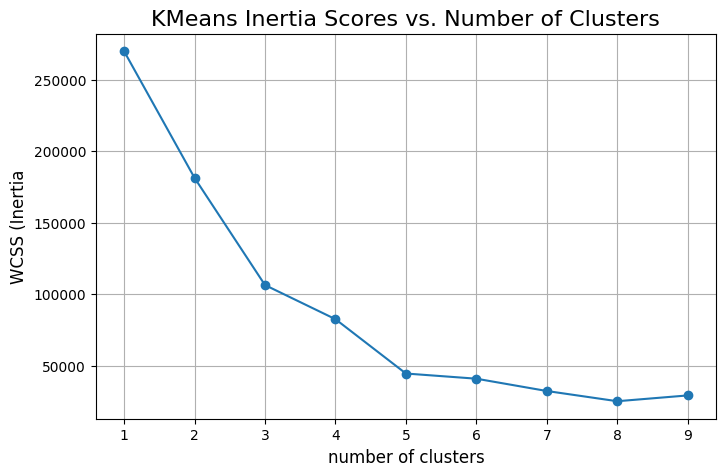

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(range_values,wcss_1, '-o')

plt.title('KMeans Inertia Scores vs. Number of Clusters', fontsize=16)
plt.xlabel('number of clusters', fontsize=12)
plt.ylabel('WCSS (Inertia', fontsize=12)
plt.grid(True)
plt.show()

In [51]:
centers = pd.DataFrame(cluster_2.cluster_centers_)
centers.columns = ['x', 'y']

In [55]:
fig = px.scatter(
    data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color='Spending and income Cluster',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="Spending Score vs Annual Income"
)

fig.add_trace(go.Scatter(
    x=centers['x'],
    y=centers['y'],
    mode='markers',
    marker=dict(size=10, color='black', symbol='star'),
    name='Cluster Centers'
))

fig.update_layout(
    width=1000,
    height=800
)

fig.show()

In [56]:
import matplotlib as mpl

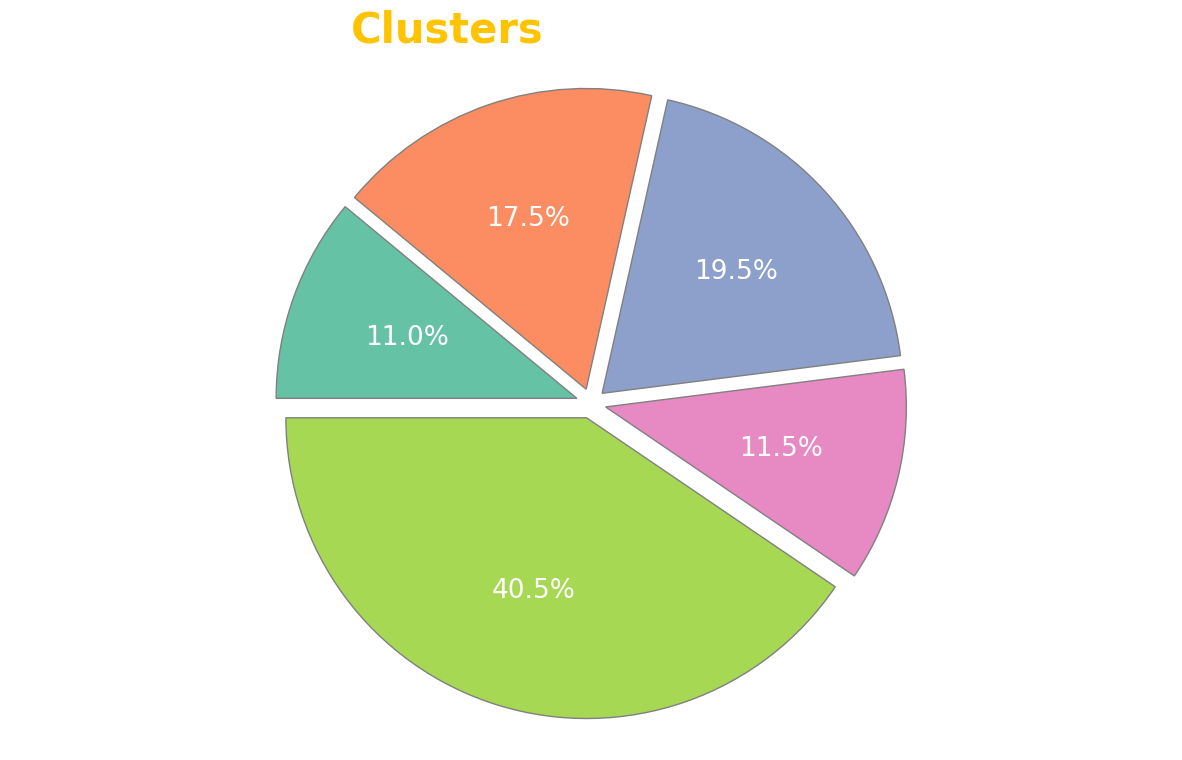

In [57]:
clusters_count = data['Spending and income Cluster'].value_counts()
clusters_count = clusters_count.to_frame().reset_index()
clusters_count.columns = ['Spending and income Cluster', 'count']
clusters_count = clusters_count.sort_values('Spending and income Cluster', ascending = True)

labels = [
        "B",
        "A",
        "D",
        "E",
        "C"
        ]

plt.figure(figsize=(15,9))
mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'],
        explode=(0.05, 0.05, 0.05, 0.05, 0.05),
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();